# Advanced Lane Finding
* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

## 1. Camera Calibration 

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
%matplotlib inline

### Original Images:

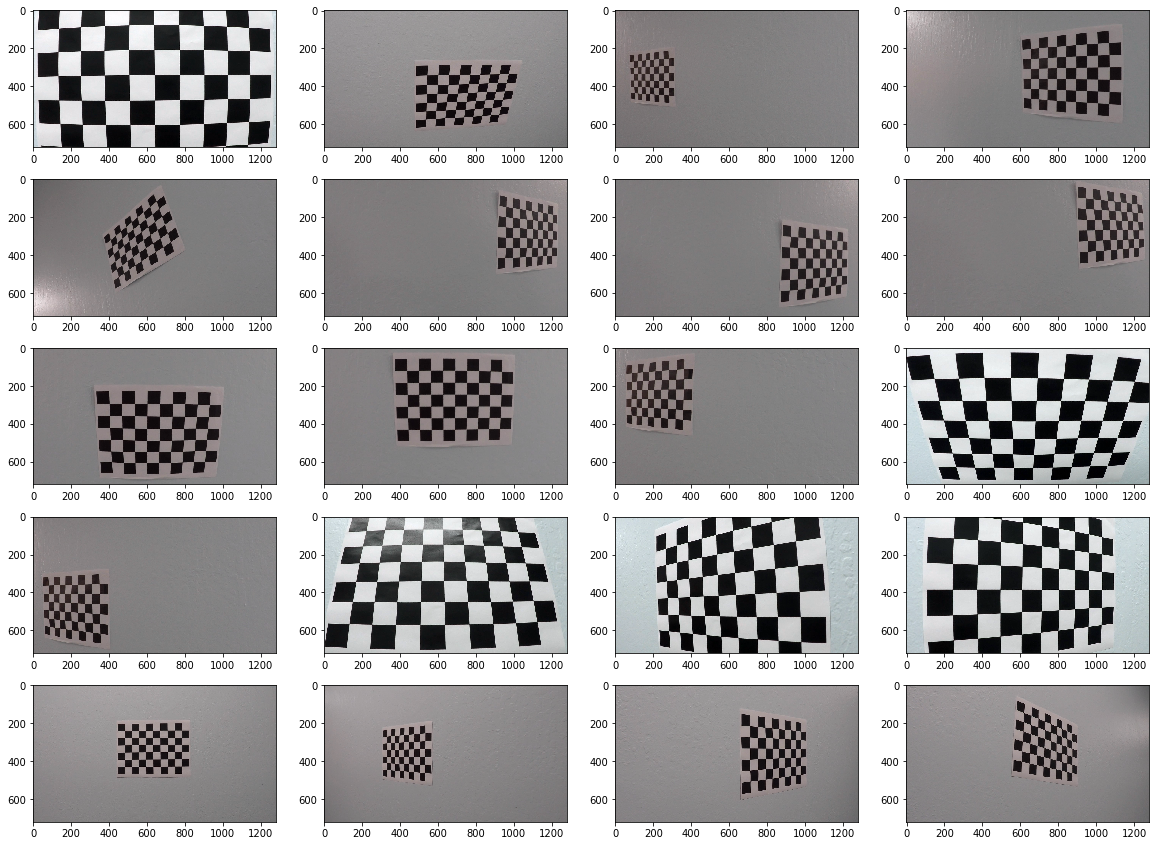

In [45]:
filelist = glob.glob('camera_cal/*.jpg')
n = len(filelist)
fig, axes = plt.subplots(5,4, figsize=(20,15))
for ax, i in zip(axes.flat, range(n)):
    ax.imshow(cv2.imread(filelist[i]))

### Get Chessboard corners

In [147]:
objpoints = []
imgpoints = []
corners_imgs = []
original_imgs = []
objp = np.zeros((6*9,3), np.float32) 
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2) # x and y cordinates.
for file in filelist:
    img = cv2.imread(file)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)
    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)
        corners_img = cv2.drawChessboardCorners(img.copy(), (9, 6), corners, ret)
        corners_imgs.append(corners_img)
        original_imgs.append(img)

In [148]:
print('Number of images with corners found: {}'.format(len(corners_imgs)))

Number of images with corners found: 17


### Get Calibration Matrix and Distortion Coefficients

In [ ]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, original_imgs[0].shape[1::-1], None, None)

#### Calibration Matrix:

In [206]:
print(mtx)

[[  1.15396093e+03   0.00000000e+00   6.69705357e+02]
 [  0.00000000e+00   1.14802496e+03   3.85656234e+02]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]


#### Distortion Coefficients:

In [210]:
print(dist)

[[ -2.41017956e-01  -5.30721173e-02  -1.15810355e-03  -1.28318856e-04
    2.67125290e-02]]


### Apply Distortion Correction to raw images

In [189]:
def draw_calibrated_image(index):
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
    f.tight_layout()
    ax1.imshow(original_imgs[index])
    ax1.set_title('Original Image', fontsize=50)
    ax2.imshow(corners_imgs[index])
    ax2.set_title('With Corners', fontsize=50)
    ax3.imshow(cv2.undistort(original_imgs[index], mtx, dist, None, mtx))
    ax3.set_title('Undistorted Image', fontsize=50)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

### Example 1

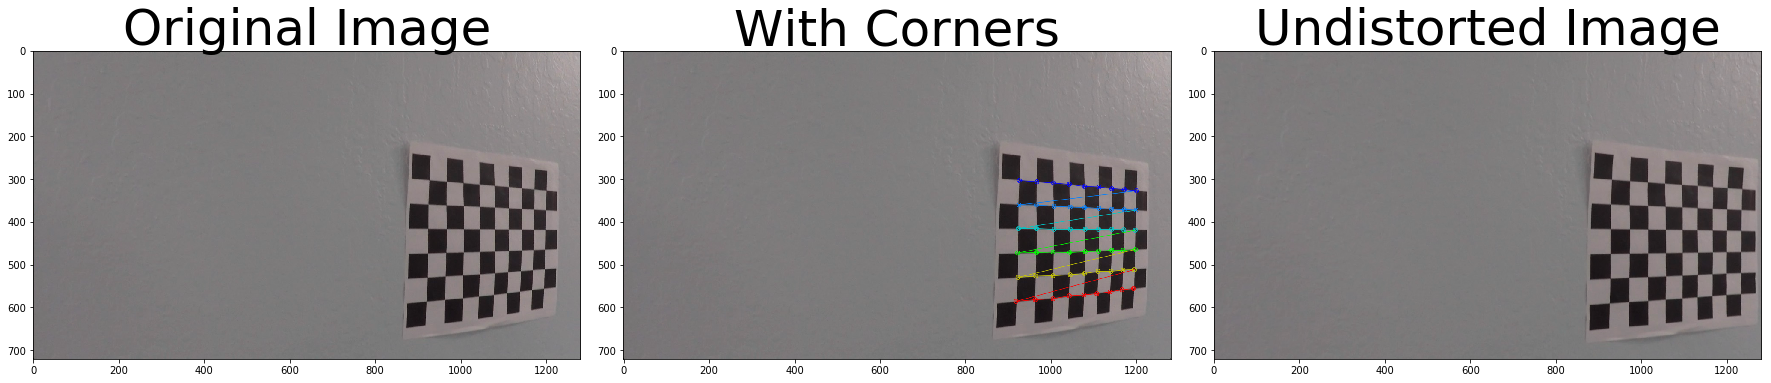

In [204]:
draw_calibrated_image(5)

### Example 2

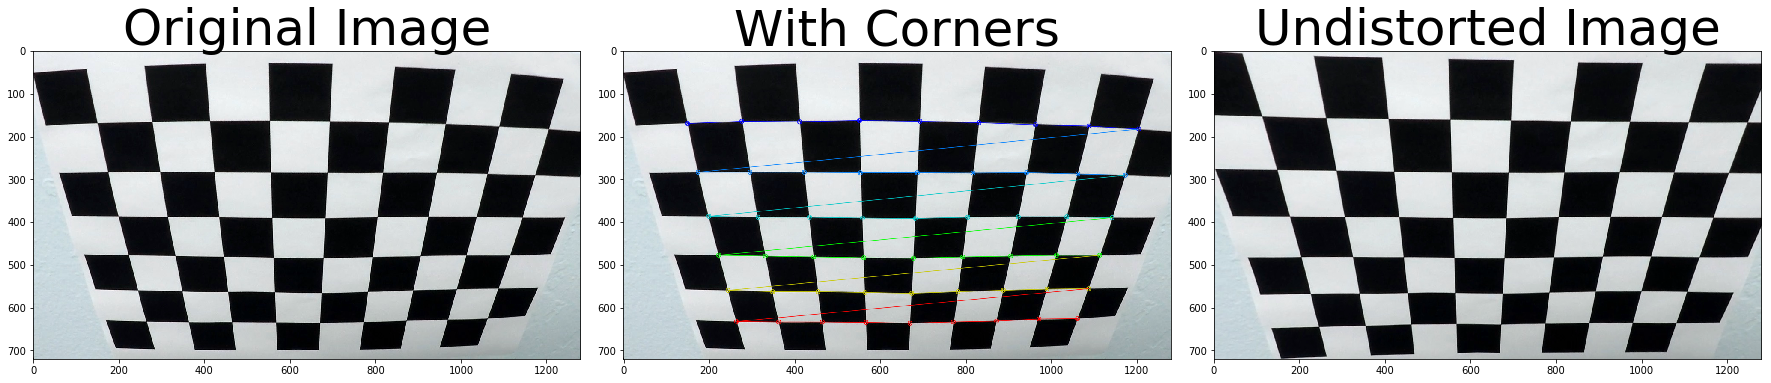

In [202]:
draw_calibrated_image(10)

### Example 3

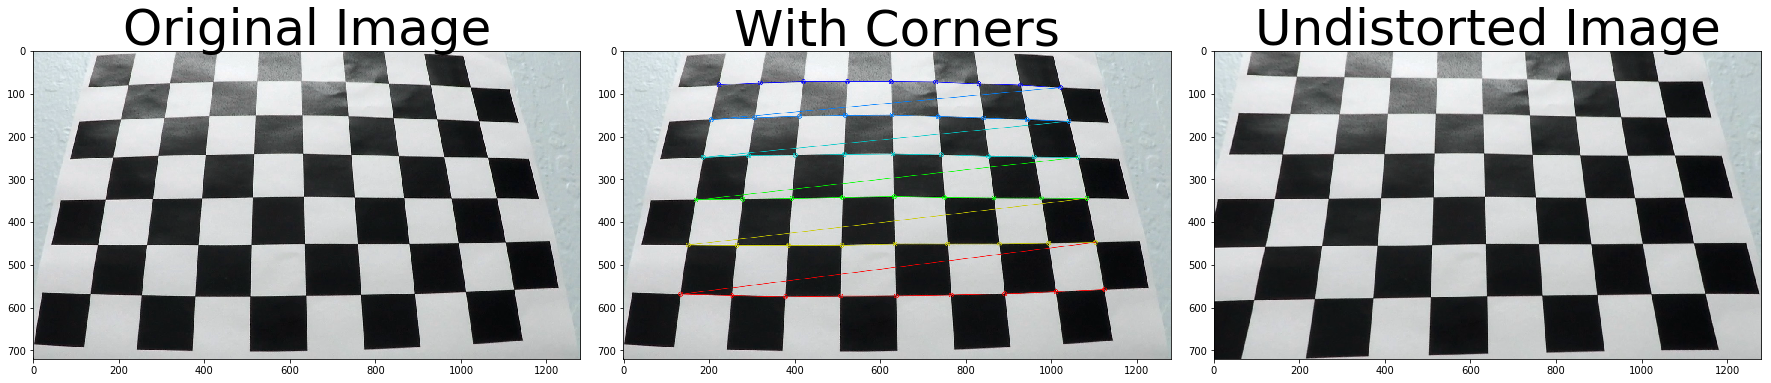

In [203]:
draw_calibrated_image(12)